In [1]:
from utils_v1 import *


In [2]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerMCDropout

In [3]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [4]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [5]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod
}
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	

dates = [2018, 2019]
dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dates = [2019, 2020]
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
#  	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:
	if type(dataset) == PA:
		exp = 2

	if type(dataset) == PADeforestationTime:
		# exp = 3 # uses past deforestation mask until 2020, which is a mistake. use it until 2018
		exp = 4 # uses past deforestation mask without dates.
		exp = 5 # uses past deforestation mask with dates. 38 epochs.
		exp = 5 # fixes mask.
		exp = 6 # uses past deforestation distance and past deforestation. didnt test it yet        
		exp = 8 # Uses fixed past deforestation distance and past deforestation. 98.9 mAP
		exp = 9 # dummy for coords. high mAP. 99.8.   
		exp = 10 # using fixed fixed past deforestation distance. mAP 90.7   
		exp = 12 # Multiple dates. using fixed fixed past deforestation distance. mAP reduced to 89.6
	if type(dataset) == PADistanceMap:
		exp = 7 # not so good result.
	if type(dataset) == PAMultipleDates:
		exp = 11 # Multiple dates. using fixed fixed past deforestation distance
		exp = 22
		exp = 50
		exp = 52
		# exp = 54
		exp = 56
		exp = 58
		# exp = 63
		# exp = 52
		# exp = 64
		# exp = 66
		exp = 66
		exp = 68
		
		# =============
		# exp = 72 # train 2015-2018
		# exp = 69 # train 2016-2018
		# exp = 70 # train 2017-2018
		
		# train 2018-2019. test 2018-2019
		# exp = 39 # old 
		exp = 76 # 88.4 mAP
		# exp = 71 # 89.5 mAP

		# =============
		
		### exp = 73
		# exp = 71
		# exp = 61

		exp = 77 # good?
		# exp = 78 # good but too short?

		exp = 90 # good result. label ok. f1 84.4 train 2018-2019
		exp = 92 # train 2017-2018
		exp = 93 # train 2016-2018
		exp = 94 # train 2015-2018
		
		exp = 96 # train 2018-2019
		exp = 97 # train 2017-2018
		exp = 98 # train 2016-2018
		exp = 99 # train 2015-2018


		exp = 103


		# train 2017-2018
		# exp = 138
		# exp = 140
		# exp = 147
	if type(dataset) == MTDeforestationTime:
		exp = 28
	if type(dataset) == MTMultipleDates:
		exp = 73 # train 2018-2019
		# exp = 74 # train 2016-2019
		# exp = 75 # train 2017-2019
		
		exp = 78 # 2019-2020

		# exp = 88 adds project past deforestation to label
		exp = 89 # ok label. so so result
		
		exp = 91 # ok label. Good result. 81.8 F1. train 2019-2020
		exp = 95 # train 2018-2019
		exp = 100 # train 2017-2019
		exp = 101 # train 2016-2019
		exp = 102 # train 2016-2019
		
		# train 2018-2019
		exp = 137

		exp = 117
		exp = 113
		exp = 110
		exp = 112
		exp = 116

	if type(dataset) == MAMultipleDates:
		exp = 146		
else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	exp = 147

trainer = TrainerMCDropout(config, dataset, patchesHandler)

trainer.defineExperiment(exp)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 2, 'removePolygons': True, 'uncertainty_method': 'pred_entropy'}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp

147

In [7]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [8]:
# ic(type(dataset), exp, dataset.dates)


In [9]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [10]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [11]:

trainer.label_mask.dtype

dtype('uint8')

In [12]:

trainer.getLabelCurrentDeforestation()

In [13]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [14]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

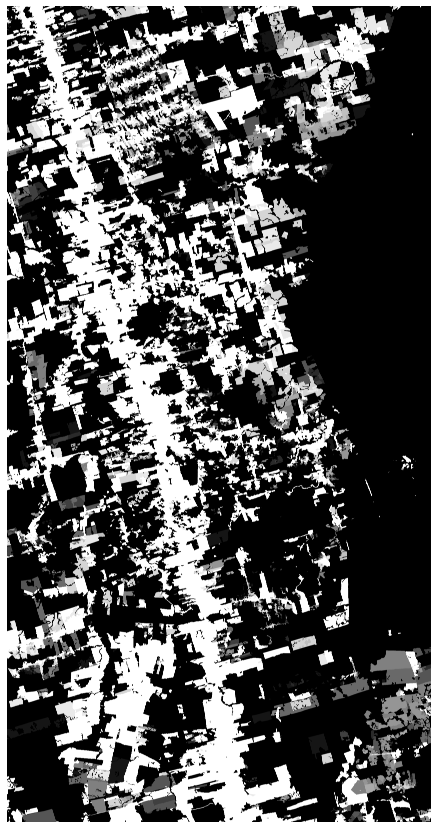

In [15]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [16]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [17]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [18]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [19]:
if config["training"] == True:
    trainer.extractCoords()

In [20]:
if config["training"] == True:
    trainer.trainTestSplit()

In [21]:
if config["training"] == True:
    trainer.label_mask.shape

In [22]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [23]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [24]:
if config["training"] == True:
    print(trainer.coords_train)

In [25]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [26]:
if config["training"] == True:
    inputSnipShow = True

In [27]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [28]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [29]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [30]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [31]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [32]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [33]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [34]:
if config["training"] == True:
    trainer.getGenerators()


In [35]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [36]:
if config["training"] == True:
    print(trainer.path_exp)

In [37]:
if config["training"] == True:
    print(trainer.channels)

In [38]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [39]:
if config["training"] == True:
    trainer.train()

In [40]:
if config["training"] == True:
    trainer.plotHistory()


In [41]:
trainer.image_stack.shape

(17730, 9200, 21)

In [42]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [43]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [44]:
trainer.image_stack.shape

(17730, 9200, 21)

In [45]:
trainer.setPadding()

-30.0 -16.0


In [46]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp147/models/resunet_0.h5'


time:  0
time:  1


In [47]:
trainer.loadPredictedProbabilities()

In [48]:
trainer.prob_rec.shape

(17760, 9216, 2)

In [49]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [50]:
trainer.prob_rec.shape

(17760, 9216, 2)

In [51]:
trainer.getMeanProb()

In [52]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 4.4059415e-25
    np.mean(value): 0.017276518
    np.max(value): 0.9961585


In [53]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [54]:
trainer.unpadMeanProb()

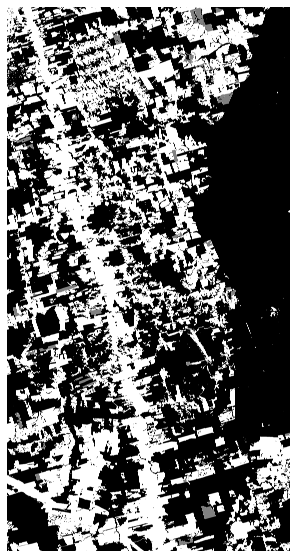

In [55]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [56]:
trainer.squeezeLabel()

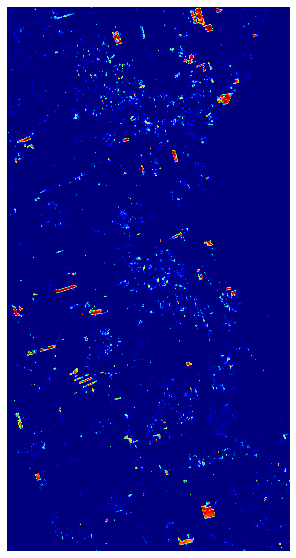

In [57]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [58]:
print(trainer.label_mask.shape)

(17730, 9200)


In [59]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [60]:
trainer.getMAP()

89.11


In [61]:
trainer.prob_rec.shape

(17760, 9216, 2)

In [62]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(2, 17760, 9216, 1)


In [63]:
trainer.prob_rec.shape

(2, 17760, 9216, 1)

In [64]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 1.0483497e-32
    np.mean(value): 0.01727659
    np.max(value): 0.9986547


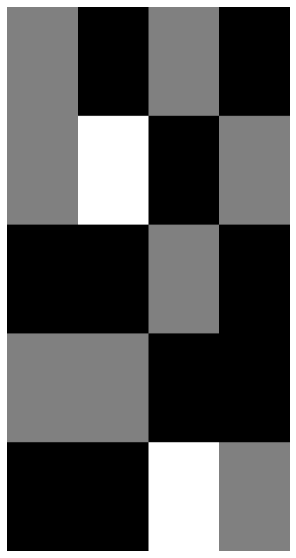

In [65]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [66]:
trainer.getLabelCurrentDeforestation()

In [67]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161003746,   2112254], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [68]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [69]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161003746,   2112254], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161292206,   1823794], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162827540,    288460], dtype=int64))
ic| predicted.shape: (17730, 9200), label_mask.shape: (17730, 9200)
ic| predicted_masked.shape: (81558000,)
    label_masked.shape: (81558000,)
ic| np.unique(label_masked, return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                  array([53372545,   727355, 27458100], dtype=int64))
ic| predicted_masked.shape: (54099900,)
    label_masked.shape: (54099900,)


In [70]:
trainer.calculateMetrics()

ic| self.f1: 84.41, self.precision: 86.08, self.recall: 82.81


In [71]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9420590,)
ic| f1_val: 85.45
    precision_val: 80.92
    recall_val: 90.51
    mAP_val: 91.19


In [72]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [73]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162452212,    663788], dtype=int64))


In [74]:
trainer.getErrorMaskToShowRGB()

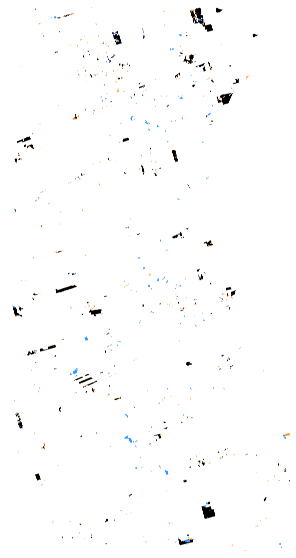

In [75]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [76]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [77]:
trainer.setUncertainty()

In [78]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.013266924
    np.max(value): 0.36787948


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

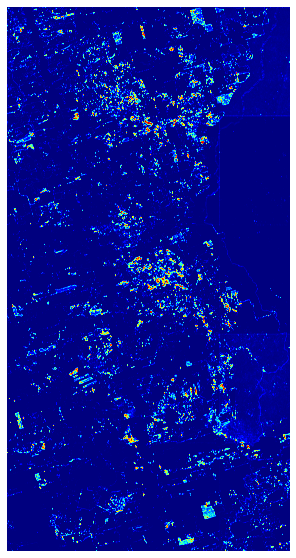

In [79]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



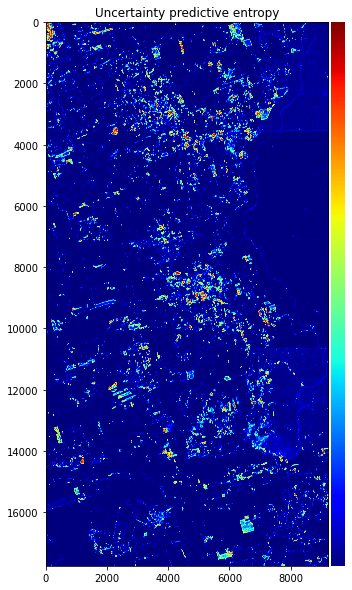

In [80]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [81]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54099900,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


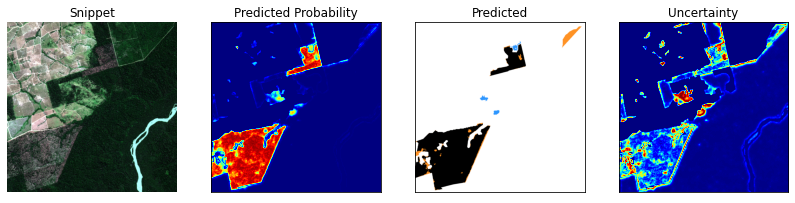

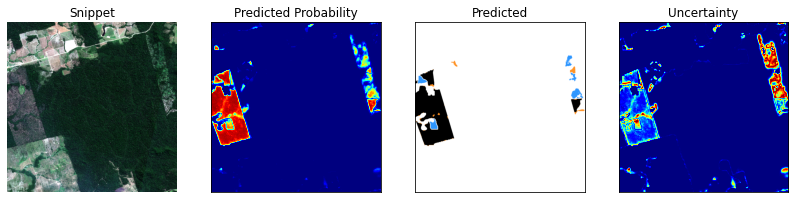

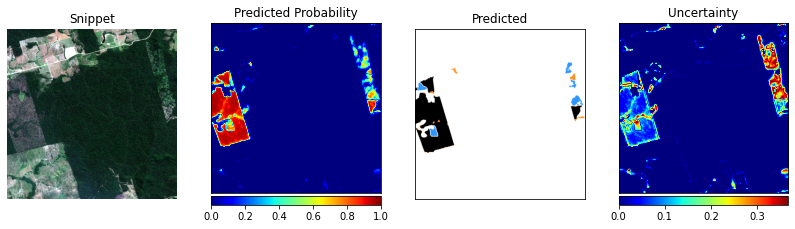

In [82]:
trainer.logger.plotCropSample(trainer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


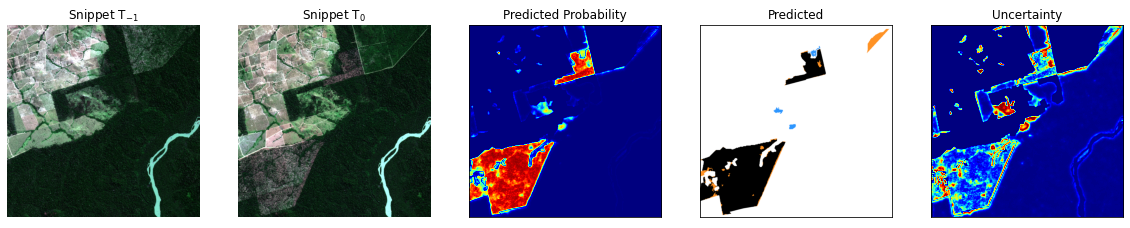

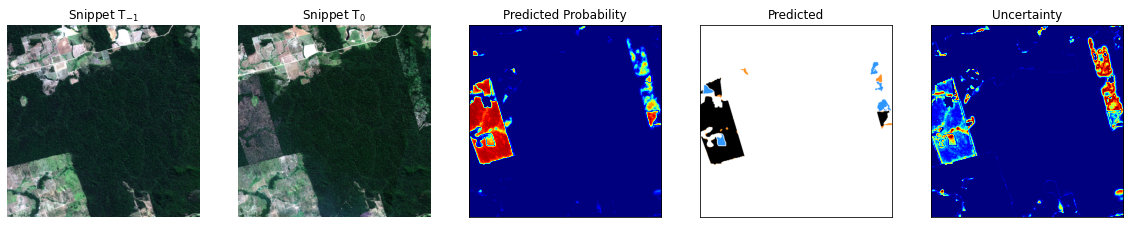

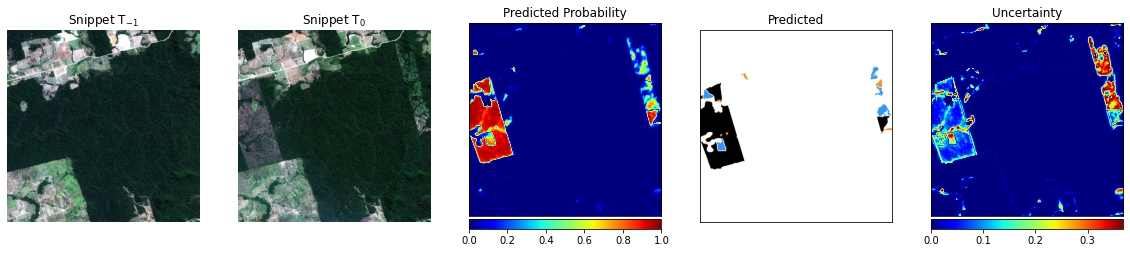

In [83]:
trainer.logger.plotCropSampleT0T1(trainer)

In [84]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [85]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [86]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 9.594217e-13
    np.mean(value): 0.01995694
    np.max(value): 0.36787948


Get precision-recall threshold

In [87]:

trainer.getUncertaintyAAValues()

AttributeError: 'TrainerMCDropout' object has no attribute 'predictor'

In [ ]:
trainer.getUncertaintyAAAuditedValues()

ic| uncertainty.shape: (22176805,)
    label_mask_current_deforestation_test.shape: (22176805,)


threshold 0.0025
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [      18    51110]]
[1.         0.99964794]
threshold 0.005
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [      48    51080]]
[1.         0.99906118]
threshold 0.0075
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [      74    51054]]
[1.         0.99855265]
threshold 0.01
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [      97    51031]]
[1.        0.9981028]
threshold 0.015
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [     156    50972]]
[1.         0.99694883]
threshold 0.025
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [     315    50813]]
[1.         0.99383899]
threshold 0.05
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [     787    50341]]
[1.         0.98460726]
threshold 0.08
(22176805,) (22176805,)
cm_audited [[22125677        0]
 [    1559    49569]]
[1.        0.9695079]
threshold 0.1
(22176805,) (22176805,)
cm_audited [[22125677  

ic| metric_values_audited: array([[1.        , 0.99964794],
                                  [1.        , 0.99906118],
                                  [1.        , 0.99855265],
                                  [1.        , 0.9981028 ],
                                  [1.        , 0.99694883],
                                  [1.        , 0.99383899],
                                  [1.        , 0.98460726],
                                  [1.        , 0.9695079 ],
                                  [1.        , 0.95886794],
                                  [0.99983121, 0.92685026],
                                  [0.9785374 , 0.87568456],
                                  [0.94729232, 0.84575966],
                                  [0.92232945, 0.81127758],
                                  [0.89391016, 0.77918166],
                                  [0.82336278, 0.7219723 ],
                                  [0.61491259, 0.62325927],
                                  [0.488

cm_audited [[22101177    24500]
 [   33814    17314]]
[0.41407184 0.33864028]


In [ ]:
trainer.setPlotLimsForUncertaintyAA()

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA()

In [88]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.015, 0.3663794801235199)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.14921501845791646
threshold 0.14921501845791646
(51636736,) (51636736,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2463164,)
    predicted_test_classified_incorrect.shape: (2463164,)


cm_correct [[51221343     5431]
 [   16339   393623]]


ic| TP_H + FN_H + FP_H + TN_H: 2463164
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 2463164
    len(label_mask_current_deforestation_test): 54099900


cm_incorrect [[2053771   92000]
 [ 108727  208666]]
[0.98639031 0.96014509 0.54117041 0.04552992 0.69401263 0.65743731]
0.23216446166560334
threshold 0.23216446166560334
(52608486,) (52608486,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1491414,)
    predicted_test_classified_incorrect.shape: (1491414,)
ic

cm_correct [[52060524    24001]
 [   26223   497738]]
cm_incorrect [[1214590   73430]
 [  98843  104551]]


| TP_H + FN_H + FP_H + TN_H: 1491414
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1491414
    len(label_mask_current_deforestation_test): 54099900


[0.95399807 0.94995238 0.68431234 0.02756778 0.58742787 0.51403188]
0.28343003691583296
threshold 0.28343003691583296
(53062978,) (53062978,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1036922,)
    predicted_test_classified_incorrect.shape: (1036922,)
ic| TP_H + FN_H + FP_H + TN_H: 1036922
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1036922
    len(label_mask_current_deforestation_test): 54099900


cm_correct [[52431981    47371]
 [   34760   548866]]
cm_incorrect [[843133  50060]
 [ 90306  53423]]
[0.92055005 0.94044131 0.75460539 0.0191668  0.51624905 0.37169256]
0.22362074938187915
threshold 0.22362074938187915
(52525548,) (52525548,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1574352,)
    predicted_test_classified_incorrect.shape: (1574352,)
ic

cm_correct [[51991098    21177]
 [   24972   488301]]
cm_incorrect [[1284016   76254]
 [ 100094  113988]]


| TP_H + FN_H + FP_H + TN_H: 1574352
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1574352
    len(label_mask_current_deforestation_test): 54099900


[0.95843393 0.95134753 0.67133793 0.02910083 0.59917368 0.53245018]
0.1952002891267045
threshold 0.1952002891267045
(52227314,) (52227314,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1872586,)
    predicted_test_classified_incorrect.shape: (1872586,)


cm_correct [[51737579    13209]
 [   21239   455287]]


ic| TP_H + FN_H + FP_H + TN_H: 1872586
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1872586
    len(label_mask_current_deforestation_test): 54099900


cm_incorrect [[1537535   84222]
 [ 103827  147002]]
[0.97180552 0.9554295  0.62594881 0.03461348 0.6357558  0.58606461]
0.21719908717495773
threshold 0.21719908717495773
(52461516,) (52461516,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1638384,)
    predicted_test_classified_incorrect.shape: (1638384,)


cm_correct [[51937161    19142]
 [   24070   481143]]


ic| TP_H + FN_H + FP_H + TN_H: 1638384
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1638384
    len(label_mask_current_deforestation_test): 54099900


cm_incorrect [[1337953   78289]
 [ 100996  121146]]
[0.96173781 0.95235673 0.66149679 0.03028442 0.60744604 0.54535387]
0.21185223858273533
threshold 0.21185223858273533
(52406670,) (52406670,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1693230,)
    predicted_test_classified_incorrect.shape: (1693230,)
ic

cm_correct [[51890933    17502]
 [   23365   474870]]
cm_incorrect [[1384181   79929]
 [ 101701  127419]]


| TP_H + FN_H + FP_H + TN_H: 1693230
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1693230
    len(label_mask_current_deforestation_test): 54099900


[0.96445371 0.95310446 0.65287239 0.03129821 0.61451762 0.55612343]
0.21843573832914293
threshold 0.21843573832914293
(52473739,) (52473739,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1626161,)
    predicted_test_classified_incorrect.shape: (1626161,)


cm_correct [[51947447    19555]
 [   24231   482506]]


ic| TP_H + FN_H + FP_H + TN_H: 1626161
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1626161
    len(label_mask_current_deforestation_test): 54099900


cm_incorrect [[1327667   77876]
 [ 100835  119783]]
[0.96105055 0.9521823  0.66337071 0.03005848 0.60600833 0.54294301]
0.21951854966768278
threshold 0.21951854966768278
(52484640,) (52484640,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1615260,)
    predicted_test_classified_incorrect.shape: (1615260,)
ic

cm_correct [[51956642    19901]
 [   24388   483709]]
cm_incorrect [[1318472   77530]
 [ 100678  118580]]


| TP_H + FN_H + FP_H + TN_H: 1615260
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1615260
    len(label_mask_current_deforestation_test): 54099900


[0.96048331 0.95200129 0.66502464 0.02985699 0.60466065 0.54082405]
0.21862995623318177
threshold 0.21862995623318177
(52475691,) (52475691,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624209,)
    predicted_test_classified_incorrect.shape: (1624209,)
ic

cm_correct [[51949105    19615]
 [   24260   482711]]
cm_incorrect [[1326009   77816]
 [ 100806  119578]]


| TP_H + FN_H + FP_H + TN_H: 1624209
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1624209
    len(label_mask_current_deforestation_test): 54099900


[0.96095165 0.95214716 0.66365255 0.0300224  0.60578336 0.5425893 ]
0.21884568784582561
threshold 0.21884568784582561
(52477913,) (52477913,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1621987,)
    predicted_test_classified_incorrect.shape: (1621987,)
ic

cm_correct [[51950993    19685]
 [   24287   482948]]
cm_incorrect [[1324121   77746]
 [ 100779  119341]]


| TP_H + FN_H + FP_H + TN_H: 1621987
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1621987
    len(label_mask_current_deforestation_test): 54099900


[0.96083624 0.95211884 0.66397839 0.02998133 0.60552446 0.54216337]
0.21875888010862354
threshold 0.21875888010862354
(52476991,) (52476991,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1622909,)
    predicted_test_classified_incorrect.shape: (1622909,)
ic

cm_correct [[51950200    19663]
 [   24278   482850]]
cm_incorrect [[1324914   77768]
 [ 100788  119439]]


| TP_H + FN_H + FP_H + TN_H: 1622909
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1622909
    len(label_mask_current_deforestation_test): 54099900


[0.96087066 0.95212648 0.66384365 0.02999837 0.60565294 0.54234494]
0.21872554353057166
threshold 0.21872554353057166
(52476645,) (52476645,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623255,)
    predicted_test_classified_incorrect.shape: (1623255,)
ic

cm_correct [[51949912    19651]
 [   24274   482808]]
cm_incorrect [[1325202   77780]
 [ 100792  119481]]


| TP_H + FN_H + FP_H + TN_H: 1623255
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1623255
    len(label_mask_current_deforestation_test): 54099900


[0.96089034 0.95213003 0.66378591 0.03000477 0.60570006 0.54242236]
0.21879221668667542
threshold 0.21879221668667542
(52477326,) (52477326,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1622574,)
    predicted_test_classified_incorrect.shape: (1622574,)


cm_correct [[51950494    19671]
 [   24281   482880]]


ic| TP_H + FN_H + FP_H + TN_H: 1622574
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1622574
    len(label_mask_current_deforestation_test): 54099900
ic| self.threshold_optimal: 0.21875888010862354


cm_incorrect [[1324620   77760]
 [ 100785  119409]]
[0.9608577  0.95212368 0.6638849  0.02999218 0.60561752 0.54228998]


In [89]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.21875888010862354
(52476991,) (52476991,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1622909,)
    predicted_test_classified_incorrect.shape: (1622909,)
ic

cm_correct [[51950200    19663]
 [   24278   482850]]
cm_incorrect [[1324914   77768]
 [ 100788  119439]]


| TP_H + FN_H + FP_H + TN_H: 1622909
    len(label_mask_current_deforestation_test): 54099900
ic| TP_H + FN_H + FP_H + TN_H: 1622909
    len(label_mask_current_deforestation_test): 54099900


[0.96087066 0.95212648 0.66384365 0.02999837 0.60565294 0.54234494]
threshold 0.21875888010862354
(54099900,) (54099900,)


ic| self.m_optimal: {'AA': array([0.02999837]),
                     'f1_H': array([0.57225334]),
                     'f1_L': array([0.95647859]),
                     'precision_H': array([0.60565294]),
                     'precision_L': array([0.96087066]),
                     'recall_H': array([0.54234494]),
                     'recall_L': array([0.95212648]),
                     'recall_Ltotal': array([0.66384365])}
ic| self.m_audited_optimal: {'f1': array([0.96969785]),
                             'precision': array([0.97279381]),
                             'recall': array([0.96662153])}


cm_audited [[53352882    19663]
 [   24278   703077]]
[0.97279381 0.96662153]
